In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#! conda install seaborn

In [3]:
df_raw = pd.read_csv("../data/train.csv")

df_raw.isna().sum(), len(df_raw)

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 891)

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Converting to numbers... 

looks like these columns are strictly categorical and can be conveted: 
- Sex
- Cabin 
- Embarked 

These may have other patterns, but need more looking into: 
- name. e.g. some title may be associated with a safer location on the ship. but name has to be parsed to estract the title
- cabin. e.g. looking at the map of the ship and where it susteined damage first may be important. 
- cabin is missing for most passengers. what does this mean?

In [6]:
import os
import sys
sys.path.insert(0, os.path.abspath('../modules'))

In [7]:
import preprocess as pp

df = pp.numerify_categorical_columns(df_raw, columns=["Sex", "Cabin", "Embarked"])
df.head()


converting Sex to category type
converting Cabin to category type
converting Embarked to category type


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,82,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,56,3
4,5,0,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,0,3


Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


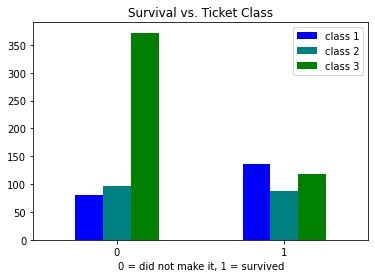

In [8]:
# Ticket Class  vs survival 

pd.crosstab(df.Survived, df.Pclass).plot(kind="bar", color=["blue", "teal", "green"], figsize=(6,4))

plt.title("Survival vs. Ticket Class")
plt.xlabel("0 = did not make it, 1 = survived")
plt.legend(["class 1", "class 2", "class 3"])
plt.xticks(rotation=0);


pd.crosstab(df.Survived, df.Pclass)


Sex,1,2
Survived,,
0,81,468
1,233,109


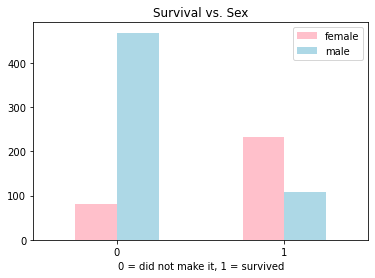

In [9]:
# Passenger sex vs. survival
pd.crosstab(df.Survived, df.Sex).plot(kind="bar", color=["pink", "lightblue"], figsize=(6,4))

plt.title("Survival vs. Sex")
plt.xlabel("0 = did not make it, 1 = survived")
plt.legend(["female", "male"])
plt.xticks(rotation=0);


pd.crosstab(df.Survived, df.Sex)

In [10]:
pd.crosstab(df.Pclass, df.Sex)

Sex,1,2
Pclass,,
1,94,122
2,76,108
3,144,347


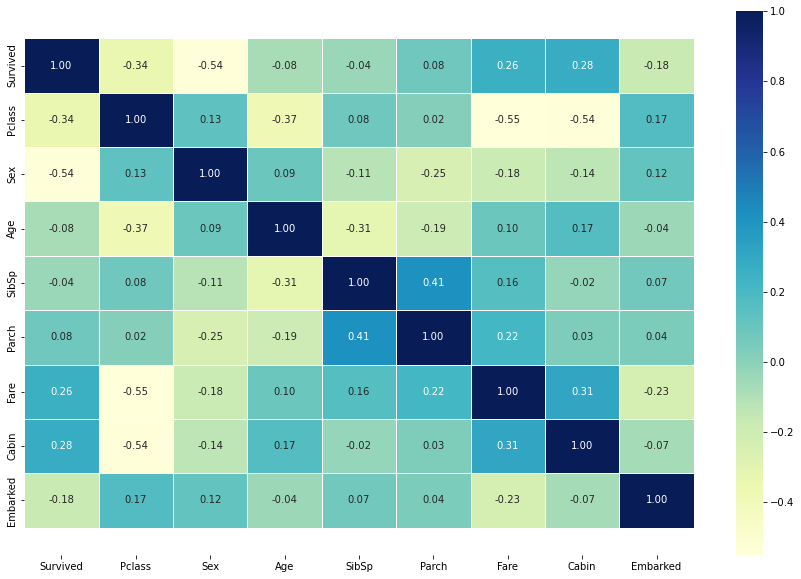

In [15]:
corr_df = df.drop("PassengerId", axis=1) # the passenger ID isn't descriptive, so there's no need to correlate with it. 
corr_matrix = corr_df.corr()

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .5, top - .5);